In [1]:
cd ..

/home/jovyan/gatech-p3


In [2]:
%run __init__.py

In [3]:
%run src/load_data.py

In [4]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

In [5]:
adult_train_data = data['adult']['train']['engineered']

In [6]:
from time import time

## Phase I

In [7]:
# !pip install tqdm

In [8]:
from tqdm import tqdm
from lib.bic import bic

def fit_and_time(model, data, variance=''):
    start = time()
    model = model.fit(data)
    end = time() - start
    return {'fit_time'+variance : end, 'model' : model}

def process_results(results_list, data, variance=''):
    df = pd.DataFrame(results_list)
    if type(results_list[0]['model']) == KMeans:
        df['k'] = df.model.apply(lambda x: x.n_clusters)
        df['bic'] = df.model.apply(lambda x: bic(x, data))
    else:
        df['k'] = df.model.apply(lambda x: x.n_components)
        df['bic'+variance] = df.model.apply(lambda x: x.bic(data))
    df.set_index('k', inplace=True)
    return df 

In [9]:
ks = range(2, 35, 1)

adult_train_data = data['adult']['train']['engineered']

kmeans_models_adult = []

for k in tqdm(ks):
    kmeans_models_adult.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), adult_train_data))
kmeans_models_adult_df = process_results(kmeans_models_adult, adult_train_data)

gm_models_adult = []    
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='full', random_state=0),
                                  adult_train_data, 'full'))
gm_models_adult_df = process_results(gm_models_adult, adult_train_data, 'full')

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='tied', random_state=0),
                                  adult_train_data, 'tied'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'tied'),left_index=True, right_index=True)

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='diag', random_state=0, reg_covar=1E-5),
                                  adult_train_data, 'diag'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'diag'),left_index=True, right_index=True)

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='spherical', random_state=0),
                                  adult_train_data, 'spherical'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'spherical'),left_index=True, right_index=True)

100%|██████████| 33/33 [00:33<00:00,  1.03s/it]


Text(0.5,1,'Fit Time number of clusters for EM')

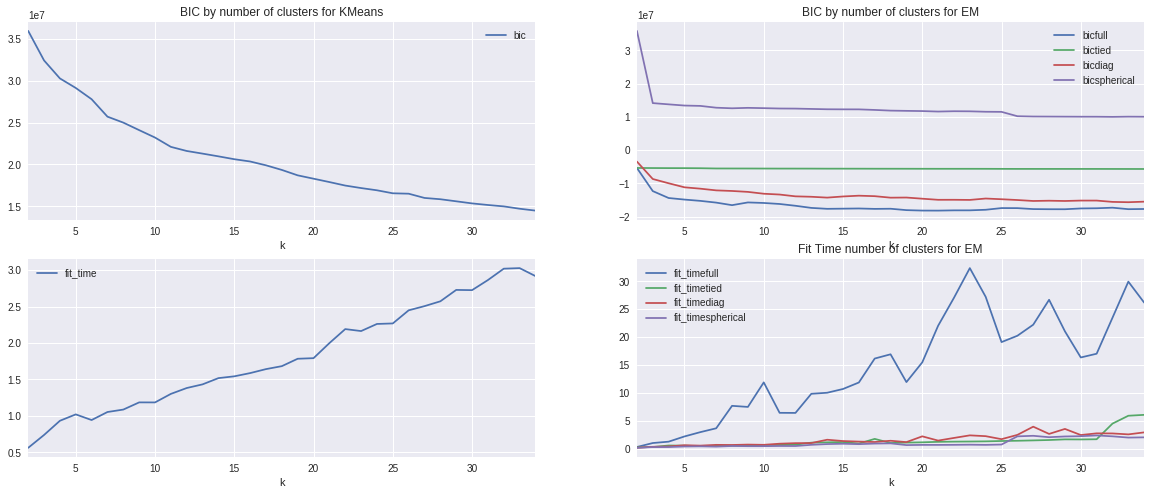

In [10]:
_, ax = plt.subplots(2,2,figsize=(20,8))
kmeans_models_adult_df[['bic']].plot(ax=ax[0][0])
ax[0][0].set_title('BIC by number of clusters for KMeans')
gm_models_adult_df[['bicfull', 'bictied', 'bicdiag', 'bicspherical']].plot(ax=ax[0][1])
ax[0][1].set_title('BIC by number of clusters for EM')
kmeans_models_adult_df[['fit_time']].plot(ax=ax[1][0])
ax[1][1].set_title('Fit Time by number of clusters for EM')
gm_models_adult_df[['fit_timefull', 'fit_timetied',  'fit_timediag', 'fit_timespherical']].plot(ax=ax[1][1])
ax[1][1].set_title('Fit Time number of clusters for EM')

In [11]:
adult_df = pd.merge(gm_models_adult_df, kmeans_models_adult_df, left_index=True, right_index=True)
adult_df.to_pickle('data/adult_cluster-raw.p')

In [12]:
ks = range(2, 35, 1)

adult_train_data = data['adult']['train']['scaled']

kmeans_models_adult = []

for k in tqdm(ks):
    kmeans_models_adult.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), adult_train_data))
kmeans_models_adult_df = process_results(kmeans_models_adult, adult_train_data)

gm_models_adult = []    
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='full', random_state=0),
                                  adult_train_data, 'full'))
gm_models_adult_df = process_results(gm_models_adult, adult_train_data, 'full')

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='tied', random_state=0),
                                  adult_train_data, 'tied'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'tied'),left_index=True, right_index=True)

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='diag', random_state=0, reg_covar=1E-5),
                                  adult_train_data, 'diag'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'diag'),left_index=True, right_index=True)

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='spherical', random_state=0),
                                  adult_train_data, 'spherical'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'spherical'),left_index=True, right_index=True)

100%|██████████| 33/33 [00:55<00:00,  1.69s/it]


In [14]:
adult_df = pd.merge(gm_models_adult_df, kmeans_models_adult_df, left_index=True, right_index=True)
adult_df.to_pickle('data/adult_cluster-scaled.p')

Text(0.5,1,'Fit Time number of clusters for EM')

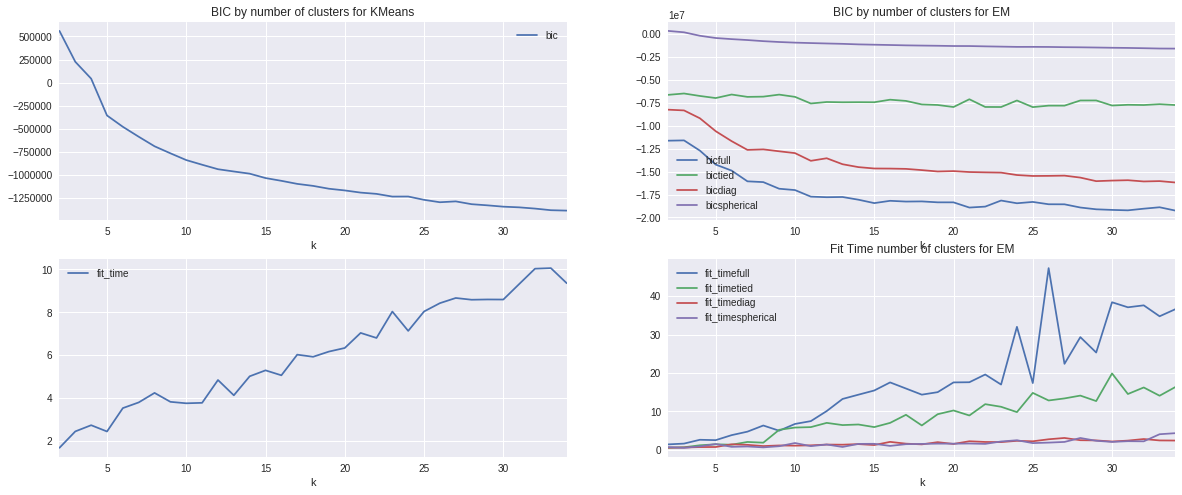

In [13]:
_, ax = plt.subplots(2,2,figsize=(20,8))
kmeans_models_adult_df[['bic']].plot(ax=ax[0][0])
ax[0][0].set_title('BIC by number of clusters for KMeans')
gm_models_adult_df[['bicfull', 'bictied', 'bicdiag', 'bicspherical']].plot(ax=ax[0][1])
ax[0][1].set_title('BIC by number of clusters for EM')
kmeans_models_adult_df[['fit_time']].plot(ax=ax[1][0])
ax[1][1].set_title('Fit Time by number of clusters for EM')
gm_models_adult_df[['fit_timefull', 'fit_timetied',  'fit_timediag', 'fit_timespherical']].plot(ax=ax[1][1])
ax[1][1].set_title('Fit Time number of clusters for EM')

In [15]:
ks = range(2, 35, 1)

adult_train_data = data['adult']['train']['gelman_scaled']

kmeans_models_adult = []

for k in tqdm(ks):
    kmeans_models_adult.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), adult_train_data))
kmeans_models_adult_df = process_results(kmeans_models_adult, adult_train_data)

gm_models_adult = []    
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='full', random_state=0),
                                  adult_train_data, 'full'))
gm_models_adult_df = process_results(gm_models_adult, adult_train_data, 'full')

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='tied', random_state=0),
                                  adult_train_data, 'tied'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'tied'),left_index=True, right_index=True)

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='diag', random_state=0, reg_covar=1E-5),
                                  adult_train_data, 'diag'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'diag'),left_index=True, right_index=True)

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='spherical', random_state=0),
                                  adult_train_data, 'spherical'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'spherical'),left_index=True, right_index=True)

100%|██████████| 33/33 [01:05<00:00,  2.00s/it]


Text(0.5,1,'Fit Time number of clusters for EM')

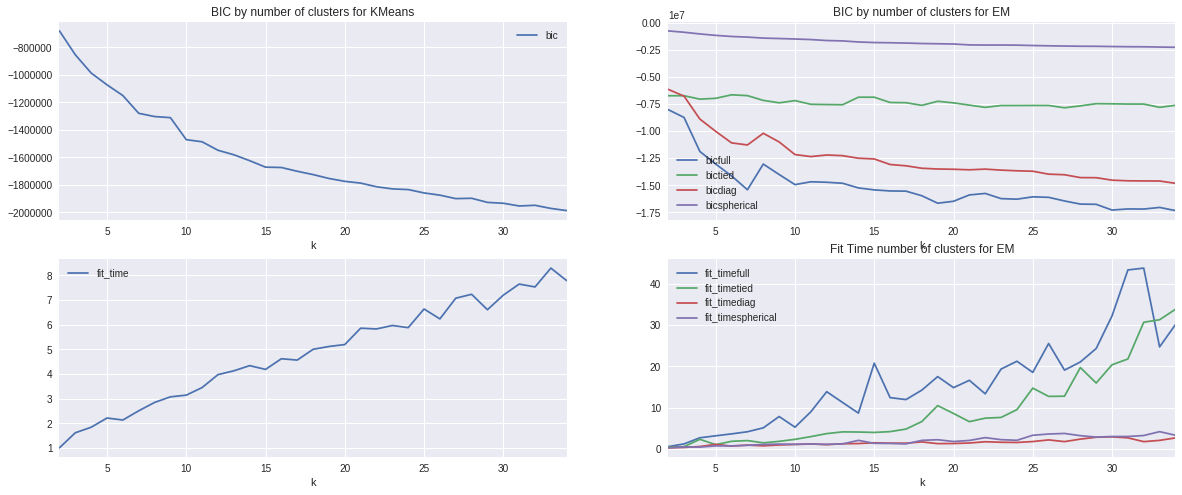

In [16]:
_, ax = plt.subplots(2,2,figsize=(20,8))
kmeans_models_adult_df[['bic']].plot(ax=ax[0][0])
ax[0][0].set_title('BIC by number of clusters for KMeans')
gm_models_adult_df[['bicfull', 'bictied', 'bicdiag', 'bicspherical']].plot(ax=ax[0][1])
ax[0][1].set_title('BIC by number of clusters for EM')
kmeans_models_adult_df[['fit_time']].plot(ax=ax[1][0])
ax[1][1].set_title('Fit Time by number of clusters for EM')
gm_models_adult_df[['fit_timefull', 'fit_timetied',  'fit_timediag', 'fit_timespherical']].plot(ax=ax[1][1])
ax[1][1].set_title('Fit Time number of clusters for EM')

In [17]:
adult_df = pd.merge(gm_models_adult_df, kmeans_models_adult_df, left_index=True, right_index=True)
adult_df.to_pickle('data/adult_cluster-gelman_scaled.p')

In [ ]:
ks = range(2, 100, 1)

adult_train_data = data['adult']['train']['scaled']

kmeans_models_adult = []

for k in tqdm(ks):
    kmeans_models_adult.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), adult_train_data))
kmeans_models_adult_df = process_results(kmeans_models_adult, adult_train_data)

gm_models_adult = []    
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='full', random_state=0),
                                  adult_train_data, 'full'))
gm_models_adult_df = process_results(gm_models_adult, adult_train_data, 'full')

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='tied', random_state=0),
                                  adult_train_data, 'tied'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'tied'),left_index=True, right_index=True)

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='diag', random_state=0, reg_covar=1E-5),
                                  adult_train_data, 'diag'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'diag'),left_index=True, right_index=True)

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='spherical', random_state=0),
                                  adult_train_data, 'spherical'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'spherical'),left_index=True, right_index=True)

 27%|██▋       | 26/98 [05:46<15:59, 13.32s/it]

In [ ]:
adult_df = pd.merge(gm_models_adult_df, kmeans_models_adult_df, left_index=True, right_index=True)
adult_df.to_pickle('data/adult_cluster-scaled-large.p')

In [ ]:
ks = range(2, 100, 1)

adult_train_data = data['adult']['train']['gelman_scaled']

kmeans_models_adult = []

for k in tqdm(ks):
    kmeans_models_adult.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), adult_train_data))
kmeans_models_adult_df = process_results(kmeans_models_adult, adult_train_data)

gm_models_adult = []    
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='full', random_state=0),
                                  adult_train_data, 'full'))
gm_models_adult_df = process_results(gm_models_adult, adult_train_data, 'full')

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='tied', random_state=0),
                                  adult_train_data, 'tied'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'tied'),left_index=True, right_index=True)

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='diag', random_state=0, reg_covar=1E-5),
                                  adult_train_data, 'diag'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'diag'),left_index=True, right_index=True)

gm_models_adult = []
for k in tqdm(ks):
    gm_models_adult.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='spherical', random_state=0),
                                  adult_train_data, 'spherical'))
gm_models_adult_df = pd.merge(gm_models_adult_df, process_results(gm_models_adult, adult_train_data, 'spherical'),left_index=True, right_index=True)

In [ ]:
adult_df = pd.merge(gm_models_adult_df, kmeans_models_adult_df, left_index=True, right_index=True)
adult_df.to_pickle('data/adult_cluster-gelman_scaled-large.p')

In [19]:
ks = range(2, 35, 1)

kmeans_models_madelon = []
madelon_train_data = data['madelon']['train']['raw_data']

for k in tqdm(ks):
    kmeans_models_madelon.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), madelon_train_data))
kmeans_models_madelon_df = process_results(kmeans_models_madelon, madelon_train_data)

gm_models_madelon = []    
for k in tqdm(ks):
    gm_models_madelon.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='full', random_state=0),
                                  madelon_train_data, 'full'))
gm_models_madelon_df = process_results(gm_models_madelon, madelon_train_data, 'full')

gm_models_madelon = []
for k in tqdm(ks):
    gm_models_madelon.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='tied', random_state=0),
                                  madelon_train_data, 'tied'))
gm_models_madelon_df = pd.merge(gm_models_madelon_df, process_results(gm_models_madelon, madelon_train_data, 'tied'),left_index=True, right_index=True)

gm_models_madelon = []
for k in tqdm(ks):
    gm_models_madelon.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='diag', random_state=0, reg_covar=1E-5),
                                  madelon_train_data, 'diag'))
gm_models_madelon_df = pd.merge(gm_models_madelon_df, process_results(gm_models_madelon, madelon_train_data, 'diag'),left_index=True, right_index=True)

gm_models_madelon = []
for k in tqdm(ks):
    gm_models_madelon.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='spherical', random_state=0),
                                  madelon_train_data, 'spherical'))
gm_models_madelon_df = pd.merge(gm_models_madelon_df, process_results(gm_models_madelon, madelon_train_data, 'spherical'),left_index=True, right_index=True)

100%|██████████| 33/33 [00:17<00:00,  1.86it/s]


In [21]:
madelon_df = pd.merge(gm_models_madelon_df, kmeans_models_madelon_df, left_index=True, right_index=True)
madelon_df.to_pickle('data/madelon_cluster-raw.p')

Text(0.5,1,'Fit Time number of clusters for EM')

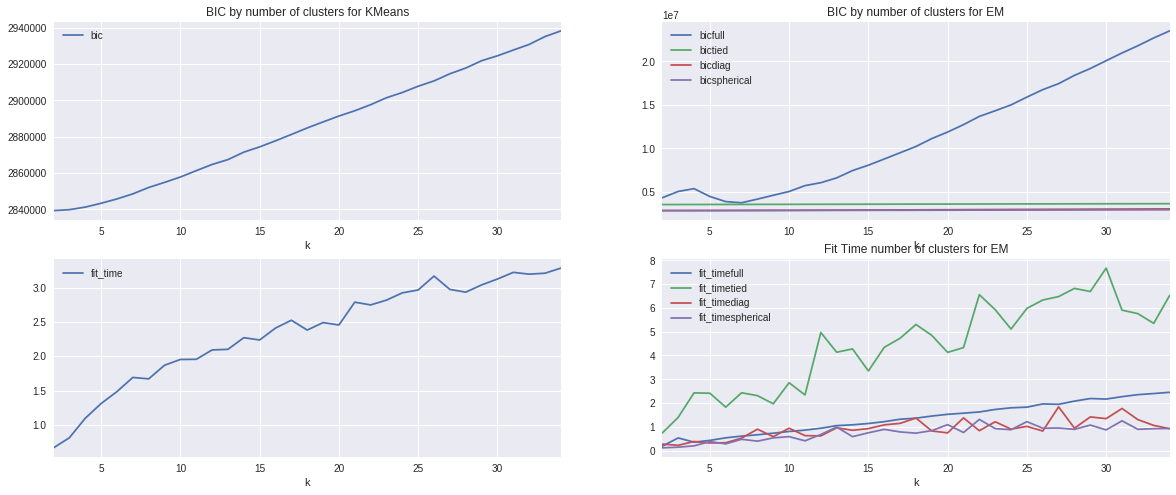

In [22]:
_, ax = plt.subplots(2,2,figsize=(20,8))
kmeans_models_madelon_df[['bic']].plot(ax=ax[0][0])
ax[0][0].set_title('BIC by number of clusters for KMeans')
gm_models_madelon_df[['bicfull', 'bictied', 'bicdiag', 'bicspherical']].plot(ax=ax[0][1])
ax[0][1].set_title('BIC by number of clusters for EM')
kmeans_models_madelon_df[['fit_time']].plot(ax=ax[1][0])
ax[1][1].set_title('Fit Time by number of clusters for EM')
gm_models_madelon_df[['fit_timefull', 'fit_timetied',  'fit_timediag', 'fit_timespherical']].plot(ax=ax[1][1])
ax[1][1].set_title('Fit Time number of clusters for EM')

In [20]:
ks = range(2, 35, 1)

madelon_train_data = data['madelon']['train']['scaled']

kmeans_models_madelon = []

for k in tqdm(ks):
    kmeans_models_madelon.append(fit_and_time(KMeans(n_clusters=k, init="k-means++"), madelon_train_data))
kmeans_models_madelon_df = process_results(kmeans_models_madelon, madelon_train_data)

gm_models_madelon = []    
for k in tqdm(ks):
    gm_models_madelon.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='full', random_state=0),
                                  madelon_train_data, 'full'))
gm_models_madelon_df = process_results(gm_models_madelon, madelon_train_data, 'full')

gm_models_madelon = []
for k in tqdm(ks):
    gm_models_madelon.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='tied', random_state=0),
                                  madelon_train_data, 'tied'))
gm_models_madelon_df = pd.merge(gm_models_madelon_df, process_results(gm_models_madelon, madelon_train_data, 'tied'),left_index=True, right_index=True)

gm_models_madelon = []
for k in tqdm(ks):
    gm_models_madelon.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='diag', random_state=0, reg_covar=1E-5),
                                  madelon_train_data, 'diag'))
gm_models_madelon_df = pd.merge(gm_models_madelon_df, process_results(gm_models_madelon, madelon_train_data, 'diag'),left_index=True, right_index=True)

gm_models_madelon = []
for k in tqdm(ks):
    gm_models_madelon.append(fit_and_time(GaussianMixture(n_components=k, covariance_type='spherical', random_state=0),
                                  madelon_train_data, 'spherical'))
gm_models_madelon_df = pd.merge(gm_models_madelon_df, process_results(gm_models_madelon, madelon_train_data, 'spherical'),left_index=True, right_index=True)

100%|██████████| 33/33 [00:24<00:00,  1.33it/s]


In [23]:
madelon_df = pd.merge(gm_models_madelon_df, kmeans_models_madelon_df, left_index=True, right_index=True)
madelon_df.to_pickle('data/madelon_cluster-scaled.p')

Text(0.5,1,'Fit Time number of clusters for EM')

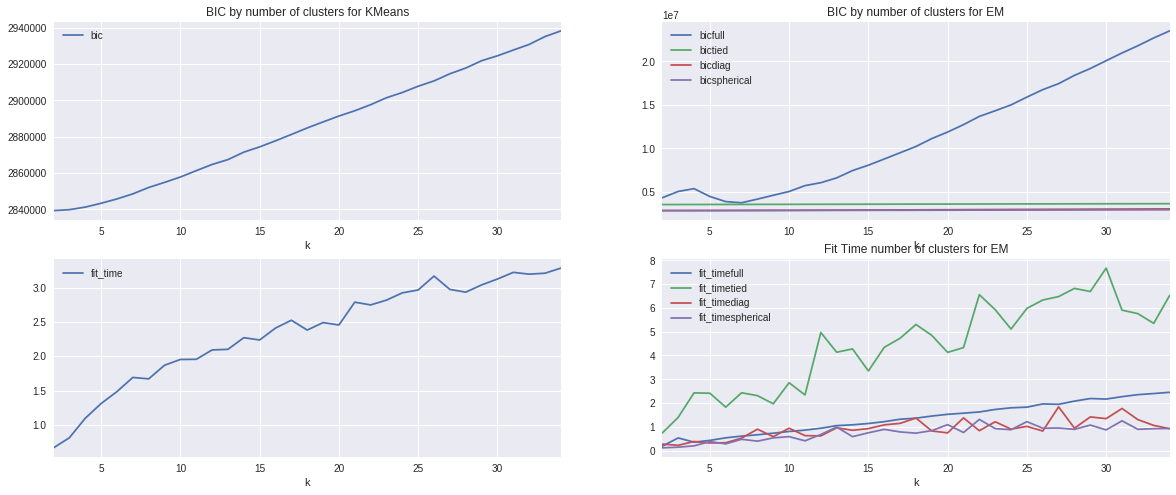

In [24]:
_, ax = plt.subplots(2,2,figsize=(20,8))
kmeans_models_madelon_df[['bic']].plot(ax=ax[0][0])
ax[0][0].set_title('BIC by number of clusters for KMeans')
gm_models_madelon_df[['bicfull', 'bictied', 'bicdiag', 'bicspherical']].plot(ax=ax[0][1])
ax[0][1].set_title('BIC by number of clusters for EM')
kmeans_models_madelon_df[['fit_time']].plot(ax=ax[1][0])
ax[1][1].set_title('Fit Time by number of clusters for EM')
gm_models_madelon_df[['fit_timefull', 'fit_timetied',  'fit_timediag', 'fit_timespherical']].plot(ax=ax[1][1])
ax[1][1].set_title('Fit Time number of clusters for EM')